To do word counts based estimates


In [63]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [64]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [65]:
#df = pd.read_csv('data/09_01_2020_use_name_no_burg.csv')
df = pd.read_csv('24_06_2020_final.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [66]:
train_df = df.iloc[train_idx, [3,2,0,1]]
bal_df = df.iloc[bal_idx, [3,2]]
valid_df = df.iloc[valid_idx, [3,2]]

In [67]:
train_df['label_final'] = np.where((((train_df['label'] == 'Burger') | (train_df['label2'] == 'Burger')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
train_df['label_final'] = np.where((((train_df['label'] == 'Kebab') | (train_df['label2'] == 'Kebab')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
train_df['label_final'] = np.where((((train_df['label'] == 'Pizza') | (train_df['label2'] == 'Pizza')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])
train_df['label_final'] = np.where((((train_df['label'] == 'Chicken') | (train_df['label2'] == 'Chicken')) & (train_df['label_final'] == 'Fast Food')), 'Burger', train_df['label_final'])

In [68]:
labels = train_df.label_final.unique()
big_list = []
for label in labels:
    counts = Counter(_ for _ in " ".join((list(train_df.ascii_name_fix[train_df.label_final==label]))).split()).most_common(10000)
    big_list += [[word[0],label, word[1]] for word in counts]

In [69]:
big_list

[['kebab', 'Kebab', 347],
 ['grill', 'Kebab', 166],
 ['house', 'Kebab', 157],
 ['and', 'Kebab', 128],
 ['restaurant', 'Kebab', 63],
 ['the', 'Kebab', 51],
 ['fish', 'Kebab', 47],
 ['kebabs', 'Kebab', 45],
 ['turkish', 'Kebab', 41],
 ['bar', 'Kebab', 35],
 ['kebabish', 'Kebab', 29],
 ['bbq', 'Kebab', 27],
 ['best', 'Kebab', 26],
 ['takeaway', 'Kebab', 25],
 ['istanbul', 'Kebab', 23],
 ['express', 'Kebab', 20],
 ['chips', 'Kebab', 18],
 ['kitchen', 'Kebab', 17],
 ['meze', 'Kebab', 14],
 ['food', 'Kebab', 14],
 ['bodrum', 'Kebab', 13],
 ['new', 'Kebab', 12],
 ['cafe', 'Kebab', 11],
 ['delight', 'Kebab', 11],
 ['flames', 'Kebab', 10],
 ['-', 'Kebab', 10],
 ['shawarma', 'Kebab', 9],
 ['tasty', 'Kebab', 9],
 ['peri', 'Kebab', 9],
 ['doner', 'Kebab', 9],
 ['curry', 'Kebab', 9],
 ['king', 'Kebab', 9],
 ['pizzeria', 'Kebab', 8],
 ['centre', 'Kebab', 8],
 ['city', 'Kebab', 8],
 ['la', 'Kebab', 7],
 ['marmaris', 'Kebab', 7],
 ['shop', 'Kebab', 7],
 ['persian', 'Kebab', 7],
 ['mediterranean', 'Keb

In [70]:
df2 = pd.DataFrame.from_records(big_list, columns=['word', 'label', 'count'])
df2 = df2[df2.label != 'Fast Food']

In [71]:
to_drop = ['the', 'and', 'of', 'restaurant', 'takeaway']
for word in to_drop:
    df2 = df2[df2['word'] != word]

to_drop = ['kebab', 'pizza', 'chicken', 'burger', 'kebabs', 'pizzas', 'burgers']
for word in to_drop:
    df2 = df2[df2['word'] != word]

    
df2.reset_index(inplace = True, drop = True)
    
df2.loc[len(df2)] = ['kebab', 'Kebab', 500]
df2.loc[len(df2)] = ['kebabs', 'Kebab', 500]
df2.loc[len(df2)] = ['pizza', 'Pizza', 500]
df2.loc[len(df2)] = ['pizzas', 'Pizza', 500]
df2.loc[len(df2)] = ['chicken', 'Chicken', 500]
df2.loc[len(df2)] = ['burger', 'Burger', 500]
df2.loc[len(df2)] = ['burgers', 'Burger', 500]

In [72]:
df2[df2.label=='Chicken']

,word,label,count
11064,peri,Chicken,189
11065,fried,Chicken,87
11066,grill,Chicken,69
11067,piri,Chicken,45
11068,express,Chicken,19
11069,house,Chicken,14
11070,bar,Chicken,12
11071,shack,Chicken,12
11072,-,Chicken,11
11073,rooster,Chicken,10


In [73]:
#df3=pd.DataFrame(pd.pivot_table(df2, values='count', index='word', columns='label', aggfunc='count', fill_value=0).to_records())
df3=pd.DataFrame(pd.pivot_table(df2, values='count', index='word', columns='label', aggfunc='sum', fill_value=0).to_records())

In [74]:
df3[df3['word']=='roll']

,word,Burger,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sand/Caf/Bake
6376,roll,1,0,1,0,0,1,0,0,2


In [75]:
df3[df3['word']=='kebab']

,word,Burger,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sand/Caf/Bake
3923,kebab,0,0,0,0,0,0,500,0,0


In [76]:
my_dict = df3.set_index('word').T.to_dict('list')

In [77]:
fast_foods = ['Pizza', 'Burger', 'Kebab', 'Chicken']
my_cols = df3.columns[1:]
len_labels = len(my_cols)
final_list =[]
for name in valid_df.ascii_name_fix:
    little_list = np.zeros(len_labels)
    for item in name.split():
        if item in my_dict:
            little_list = np.array(my_dict[item]) + little_list
    if not np.any(little_list):
        final_list.append(random.choice(my_cols))
        #final_list.append('Other')
    else:
        #final_list.append(little_list)
        max_cat = little_list.max()
        temp_list = [1 if x > 0.5 else 0 for x in little_list/max_cat]
        ff_check = list(my_cols[[x==1 for x in temp_list]])
        if sum(el in ff_check for el in fast_foods) > 1:
            final_list.append('Fast Food')
        else:
            final_list.append(my_cols[little_list.argmax()])
        

In [78]:
#my_cols_no_burg = list(my_cols)

In [79]:
#my_cols_no_burg.remove('Burger')

In [80]:
#final_list = [random.choice(my_cols_no_burg) if x == 'Burger' else x for x in final_list]

In [81]:
final_list

['Fast Food',
 'Burger',
 'Pizza',
 'Indian',
 'Sand/Caf/Bake',
 'Fish & Chips',
 'Burger',
 'Kebab',
 'Chinese',
 'Fast Food',
 'Fast Food',
 'Fast Food',
 'Pizza',
 'Fish & Chips',
 'Fast Food',
 'Sand/Caf/Bake',
 'Fish & Chips',
 'Fish & Chips',
 'Fast Food',
 'Fast Food',
 'Sand/Caf/Bake',
 'Fast Food',
 'Chinese',
 'Indian',
 'Chicken',
 'Indian',
 'Pizza',
 'Fast Food',
 'Burger',
 'Fish & Chips',
 'Fast Food',
 'Sand/Caf/Bake',
 'Indian',
 'Chicken',
 'Fast Food',
 'Pizza',
 'Sand/Caf/Bake',
 'Indian',
 'Desserts',
 'Fast Food',
 'Kebab',
 'Chinese',
 'Pizza',
 'Chinese',
 'Pizza',
 'Fast Food',
 'Kebab',
 'Pizza',
 'Burger',
 'Indian',
 'Pizza',
 'Desserts',
 'Fast Food',
 'Chinese',
 'Burger',
 'Fish & Chips',
 'Fast Food',
 'Chicken',
 'Sand/Caf/Bake',
 'Indian',
 'Indian',
 'Chinese',
 'Indian',
 'Desserts',
 'Pizza',
 'Kebab',
 'Sand/Caf/Bake',
 'Fish & Chips',
 'Chinese',
 'Chinese',
 'Fish & Chips',
 'Fast Food',
 'Chinese',
 'Fast Food',
 'Fish & Chips',
 'Kebab',
 'Fast

In [82]:
Counter(final_list).most_common()

[('Fast Food', 716),
 ('Indian', 597),
 ('Pizza', 502),
 ('Fish & Chips', 432),
 ('Chinese', 410),
 ('Sand/Caf/Bake', 303),
 ('Chicken', 287),
 ('Kebab', 260),
 ('Burger', 248),
 ('Desserts', 245)]

In [83]:
valid_df['predict'] = final_list
valid_df['ind'] = valid_df['label_final'] == valid_df['predict']
results = valid_df.groupby(['label_final'])['ind'].agg(sum).reset_index()
sum(results['ind']/400)/9

0.6680555555555556

In [84]:
results

,label_final,ind
0,Burger,117.0
1,Chicken,224.0
2,Chinese,279.0
3,Desserts,196.0
4,Fast Food,321.0
5,Fish & Chips,282.0
6,Indian,302.0
7,Kebab,217.0
8,Pizza,287.0
9,Sand/Caf/Bake,180.0


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
df_confusion = confusion_matrix(valid_df['label_final'], valid_df['predict'], labels = results['label_final'])
#df_confusion = pd.crosstab(valid_df['label'], valid_df['predict'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [94]:
    def plot_confusion_matrix(df_confusion, classes, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = df_confusion
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

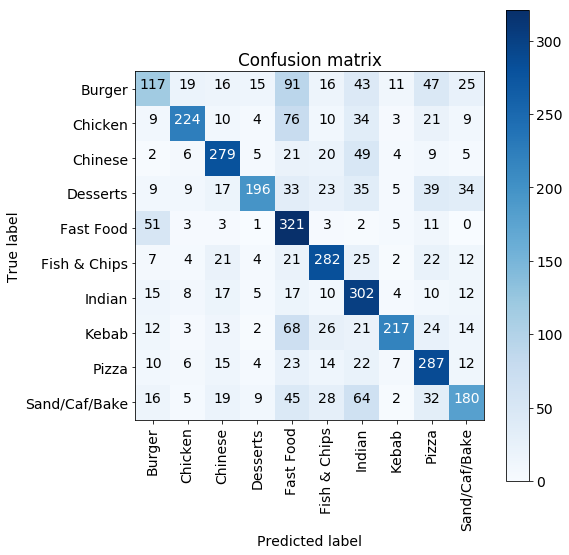

In [95]:
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(df_confusion, classes = results['label_final'], figsize=(8,8))

In [89]:
#Precision = tp / tp + fp
recall = np.diag(df_confusion) / np.sum(df_confusion, axis = 1)
precision = np.diag(df_confusion) / np.sum(df_confusion, axis = 0)

In [90]:
recall

array([0.2925, 0.56  , 0.6975, 0.49  , 0.8025, 0.705 , 0.755 , 0.5425, 0.7175, 0.45  ])

In [91]:
precision

array([0.471774, 0.780488, 0.680488, 0.8     , 0.448324, 0.652778, 0.505863, 0.834615, 0.571713, 0.594059])

In [96]:
cats = results.label_final.unique()
cats.sort()
data = [[cats],[recall],[precision]] 
  
data = {'Cuisine':cats, 'Recall (sensitivity)':recall, 'Precision (PPV)':precision} 
df = pd.DataFrame(data) 

In [97]:
df.loc['mean'] = df.mean()

In [98]:
df

,Cuisine,Recall (sensitivity),Precision (PPV)
0,Burger,0.29250,0.471774
1,Chicken,0.56000,0.780488
2,Chinese,0.69750,0.680488
3,Desserts,0.49000,0.800000
4,Fast Food,0.80250,0.448324
5,Fish & Chips,0.70500,0.652778
6,Indian,0.75500,0.505863
7,Kebab,0.54250,0.834615
8,Pizza,0.71750,0.571713
9,Sand/Caf/Bake,0.45000,0.594059


In [92]:
recall.mean()

0.6012500000000001

In [93]:
precision.mean()

0.6340102187961132